# Classification of Credit Scores with Artificial Neural Networks

## Inroduction

The credit score of a person determines the creditworthiness of the person. It helps financial companies determine if you can repay the loan or credit you are applying for.

## Content
1. [Python Libraries](#1)
2. [Variable Description](#2)
3. [Reading and Editing Data](#3)
    * [Editing Numeric Data](#4)
4. [Handling Missing Value](#6)
    * [Handling Missing Value for Categorical Variables](#7)
    * [Handling Missing Value for Numerical Variables](#8)
5. [Data Preprocessing](#9)
6. [Model Building](#10)

<a id="1"></a>
## Python Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,accuracy_score,classification_report, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


<a id="2"></a>
## Variable Description

* **ID:** Unique ID of the record
* **Customer_ID:** Unique ID of the customer
* **Month:** Month of the year
* **Name:** The name of the person
* **Age:** The age of the person
* **SSN:** Social Security Number of the person
* **Occupation:** The occupation of the person
* **Annual_Income:** The Annual Income of the person
* **Monthly_Inhand_Salary:** Monthly in-hand salary of the person
* **Num_Bank_Accounts:** The number of bank accounts of the person
* **Num_Credit_Card:** Number of credit cards the person is having
* **Interest_Rate:** The interest rate on the credit card of the person
* **Num_of_Loan:** The number of loans taken by the person from the bank
* **Type_of_Loan:** The types of loans taken by the person from the bank
* **Delay_from_due_date:** The average number of days delayed by the person from the date of payment
* **Num_of_Delayed_Payment:** Number of payments delayed by the person
* **Changed_Credit_Card:** The percentage change in the credit card limit of the person
* **Num_Credit_Inquiries:** The number of credit card inquiries by the person
* **Credit_Mix:** Classification of Credit Mix of the customer
* **Outstanding_Debt:** The outstanding balance of the person
* **Credit_Utilization_Ratio:** The credit utilization ratio of the credit card of the customer
* **Credit_History_Age:** The age of the credit history of the person
* **Payment_of_Min_Amount:** Yes if the person paid the minimum amount to be paid only, otherwise no.
* **Total_EMI_per_month:** The total EMI per month of the person
* **Amount_invested_monthly:** The monthly amount invested by the person
* **Payment_Behaviour:** The payment behaviour of the person
* **Monthly_Balance:** The monthly balance left in the account of the person
* **Credit_Score:** The credit score of the person

<a id="3"></a>
## Reading and Editing Data

In this section: We will import data and observe data. Then We will find and correct incorrectly entered values in each variable.

In [2]:
train= pd.read_csv("/kaggle/input/credit-score-classification/train.csv" , sep = "," , encoding = 'utf-8',na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])
test=  pd.read_csv("/kaggle/input/credit-score-classification/test.csv" , sep = "," , encoding = 'utf-8',na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])

len_train=len(train)
len_train

100000

In [3]:
data=pd.concat([train,test], axis=0).reset_index(drop=True)
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
data.shape

(150000, 28)

In [5]:
data_copy=data.copy()

In [6]:
# Check Duplicated value:
data_copy[data_copy.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [7]:
data_types=data.dtypes
data_types

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [8]:
# Check Missing Value
data_copy.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                        15000
Age                             0
SSN                          8400
Occupation                  10500
Annual_Income                   0
Monthly_Inhand_Salary       22500
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                17112
Delay_from_due_date             0
Num_of_Delayed_Payment      10500
Changed_Credit_Limit         3150
Num_Credit_Inquiries         3000
Credit_Mix                  30000
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age          13500
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      6750
Payment_Behaviour           11400
Monthly_Balance              1762
Credit_Score                50000
dtype: int64

In [9]:
print("Descriptive statistics:")
data_copy.describe()

Descriptive statistics:


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,146850.000000,147000.000000,150000.000000,150000.000000
mean,4190.115139,17.006940,22.623447,71.234907,21.063400,10.384299,28.529014,32.283309,1432.513579
std,3180.489657,117.069476,129.143006,461.537193,14.860154,6.786522,194.456058,5.113315,8403.759977
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,-6.490000,0.000000,20.000000,0.000000
25%,1625.265833,3.000000,4.000000,8.000000,10.000000,5.330000,3.000000,28.054731,30.947775
50%,3091.000000,6.000000,5.000000,13.000000,18.000000,9.410000,6.000000,32.297058,71.280006
75%,5948.454596,7.000000,7.000000,20.000000,28.000000,14.840000,9.000000,36.487954,166.279555
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,36.970000,2597.000000,50.000000,82398.000000


Outlier variables in the data set contain outliers.

In [10]:
# Let's convert the month variable to historical format
data_copy.Month=pd.to_datetime(data_copy.Month,format="%B").dt.month
data_copy.Month=data_copy.Month.astype(np.int64)
data_copy.Month.head()

0    1
1    2
2    3
3    4
4    5
Name: Month, dtype: int64

In [11]:
# describe for categorical variable
data_copy.describe(include='object').T

,count,unique,top,freq
ID,150000,150000,0x1602,1
Customer_ID,150000,12500,CUS_0xd40,12
Name,135000,10139,Stevex,66
Age,150000,2524,39,4198
SSN,141600,12500,078-73-5990,12
Occupation,139500,15,Lawyer,9899
Annual_Income,150000,21192,36585.12,24
Num_of_Loan,150000,623,3,21500
Type_of_Loan,132888,6260,Not Specified,2112
Num_of_Delayed_Payment,139500,1058,19,7949


<a id="4"></a>
## Editing Numeric Data

* The term "extract" is often used to extract specific information or elements from a data set.
* '\d': This is a class of abbreviation characters used in regular expressions and represents any number between 0 and 9.
* '+': This quantifier means "one or more occurrences of the previous element". In this case it applies to \d and specifies that one or more digits must match.
* Therefore, '(\d+)' generally means "match and capture one or more consecutive digits".

In [12]:
num_features_cols=["Age","Num_of_Loan"]

for i in num_features_cols:
    data_copy[i]=data_copy[i].str.extract("(\d+)").astype(int)

data_copy.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [13]:
## editing for float values

num_features_cols=["Outstanding_Debt","Annual_Income","Amount_invested_monthly","Monthly_Balance"]

for i in num_features_cols:
    data_copy[i]=data_copy[i].str.extract(r"(\d+\.\d+)").astype(float)

data_copy.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [14]:
data_copy['Num_of_Delayed_Payment'] = data_copy['Num_of_Delayed_Payment'].str.extract('(\d+)').astype(float)

In [15]:
# lets examine describe:
data_copy.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,150000.000000,150000.000000,1.500000e+05,127500.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,139500.000000,146850.000000,147000.000000,150000.000000,150000.000000,150000.000000,136770.000000,146555.000000
mean,6.500000,119.337940,1.730552e+05,4190.115139,17.006940,22.623447,71.234907,10.941093,21.063400,30.934301,10.384299,28.529014,1426.220376,32.283309,1432.513579,195.305028,402.468645
std,3.452064,682.554219,1.404215e+06,3180.489657,117.069476,129.143006,461.537193,63.045460,14.860154,224.530918,6.786522,194.456058,1155.127101,5.113315,8403.759977,198.599612,213.657707
min,1.000000,14.000000,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,3.750000,25.000000,1.945549e+04,1625.265833,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.330000,3.000000,566.072500,28.054731,30.947775,72.232194,270.150476
50%,6.500000,34.000000,3.757861e+04,3091.000000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.155000,32.297058,71.280006,128.984784,336.625664
75%,9.250000,43.000000,7.279690e+04,5948.454596,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.840000,9.000000,1945.962500,36.487954,166.279555,236.844304,470.085170
max,12.000000,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5799.000000,1496.000000,67.000000,4399.000000,36.970000,2597.000000,4998.070000,50.000000,82398.000000,1977.326102,1606.518192


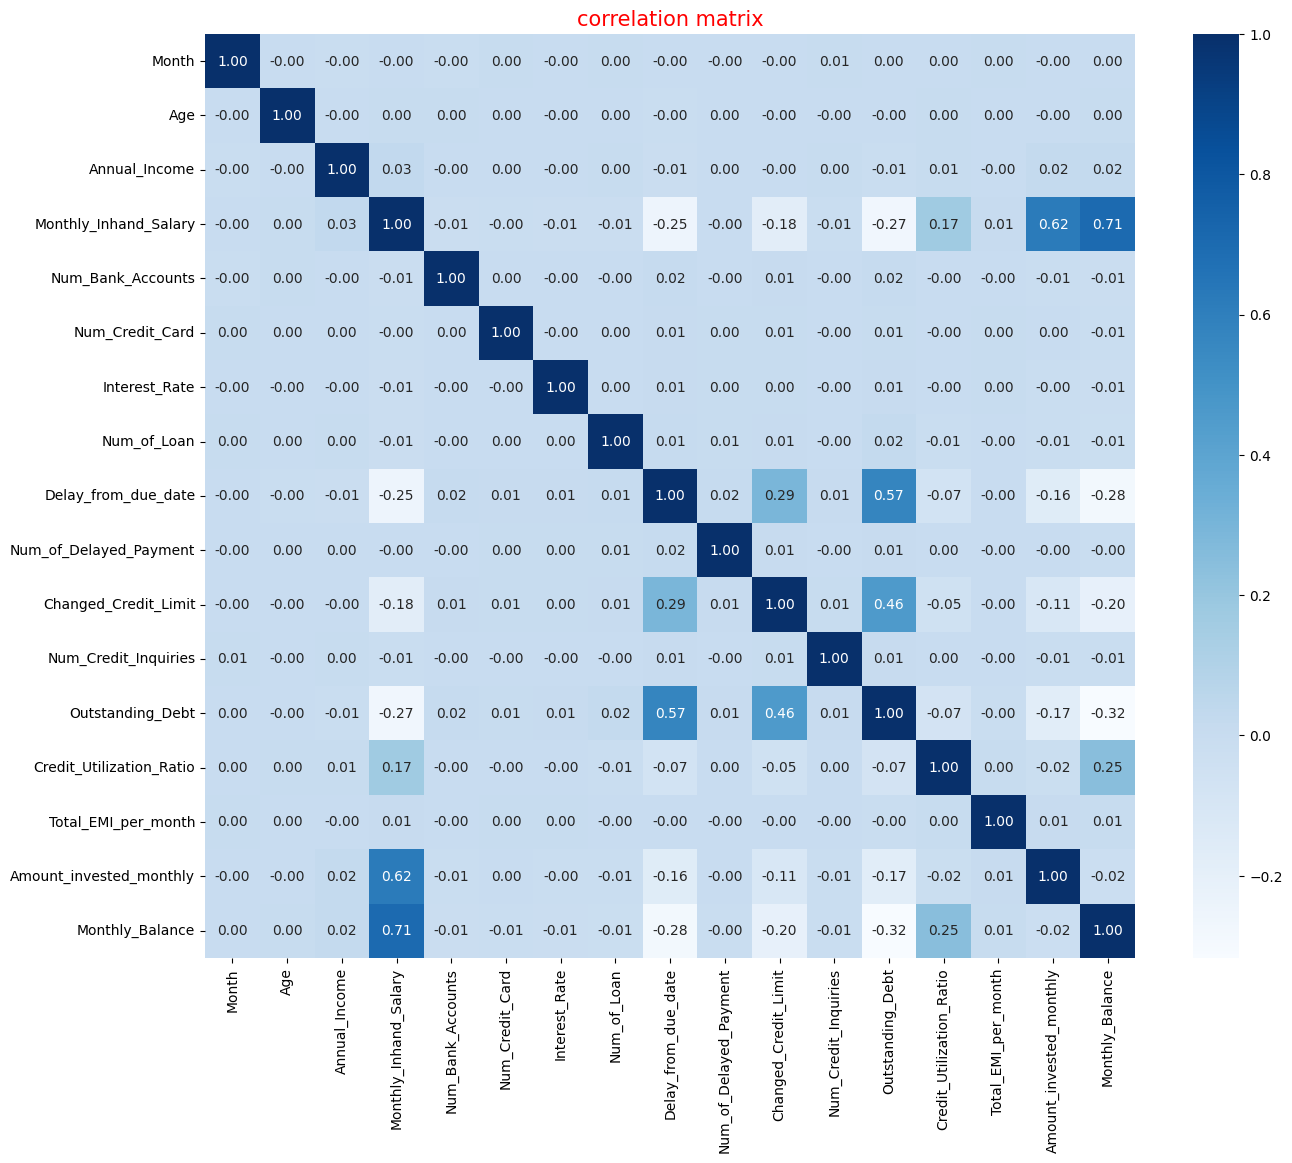

In [16]:
# correlation analysis
df_corr=data_copy.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(15,12))
plt.title("correlation matrix", color="red",fontsize=15)
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f")
sns.set(font_scale=1,style='white')
plt.show()

* There is a moderate positive a high correlation between Monthly_Inhand_Salary and Monthly_Balance

<a id="6"></a>
## Handling Missing Value

* We will fill in the empty values in the loan type variables with the KNN Imputer method.
* We will visualize the missing data with the help of the missingno library. We will examine the correlation between missing data. If the correlation is high, the missing data did not occur randomly. In this case, we will remove these observations from the data set.
* Each id represents a customer and the customer has multiple transactions recorded. Considering this situation, we will fill in the missing values.

In [17]:
data_copy[data_copy['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,NaN,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
100000,0x160a,CUS_0xd40,9,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,NaN
100001,0x160b,CUS_0xd40,10,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,NaN


Each id represents a single customer. We will implement our null value filling strategy accordingly.

<a id="7"></a>
### Handling Missing Value for Categorical Variables

* We will fill the categorical empty values with the mode of the values of the variables corresponding to each customer.

#### 1) Name

In [18]:
data_copy["Name"].fillna(value=data_copy.groupby("Customer_ID")["Name"].transform(lambda x: x.mode().iloc[0]),inplace=True)
data_copy[data_copy['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,NaN,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
100000,0x160a,CUS_0xd40,9,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,NaN
100001,0x160b,CUS_0xd40,10,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,NaN


In [19]:
data_copy["Name"].isnull().sum()

0

#### 2)SSN

In [20]:
data_copy["SSN"].fillna(value=data_copy.groupby("Customer_ID")["SSN"].transform(lambda x: x.mode().iloc[0]),inplace=True)
data_copy[data_copy['Customer_ID']=='CUS_0xd40']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,NaN,340.479212,Good
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
100000,0x160a,CUS_0xd40,9,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702,NaN
100001,0x160b,CUS_0xd40,10,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004,NaN


In [21]:
data_copy["SSN"].isnull().sum()

0

In [22]:
# Let's remove the hyphens in the SS numbers:
data_copy["SSN"]=data_copy["SSN"].apply(lambda x:int("".join(x.split("-"))) if pd.notna(x) else x).astype(np.int64)

#### 3) Occupation

In [23]:
data_copy["Occupation"].fillna(value=data_copy.groupby("Customer_ID")["Occupation"].transform(lambda x: x.mode().iloc[0]),inplace=True)
data_copy[data_copy["Customer_ID"]=="CUS_0x21b1"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,1,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,2,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,0x1610,CUS_0x21b1,3,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,NaN,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
11,0x1611,CUS_0x21b1,4,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
12,0x1612,CUS_0x21b1,5,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
13,0x1613,CUS_0x21b1,6,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
14,0x1614,CUS_0x21b1,7,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,31.131702,27 Years and 1 Months,NM,18.816215,70.101774,High_spent_Medium_value_payments,464.880678,Good
15,0x1615,CUS_0x21b1,8,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
100004,0x1616,CUS_0x21b1,9,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,NaN
100005,0x1617,CUS_0x21b1,10,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083,NaN


In [24]:
data_copy["Occupation"].isnull().sum()

0

#### 4) Type of Loan

* Since customers' credit types may change over time, I will not fill in the empty values in this variable with the mod.

In [25]:
data_copy["Customer_ID"].unique()

array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)

In [26]:
data_copy[data_copy["Customer_ID"]=="CUS_0xaf61"][["Month","Age","Occupation",
                                                  "Annual_Income","Num_of_Loan",
                                                  "Type_of_Loan","Credit_History_Age",
                                                  "Credit_Score"]]

,Month,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Credit_History_Age,Credit_Score
99976,1,49,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",29 Years and 9 Months,Good
99977,2,49,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",29 Years and 10 Months,Good
99978,3,49,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",29 Years and 11 Months,Good
99979,4,49,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 0 Months,Good
99980,5,49,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 1 Months,Standard
99981,6,50,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 2 Months,Good
99982,7,50,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 3 Months,Good
99983,8,50,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 4 Months,Good
149988,9,50,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 5 Months,NaN
149989,10,50,Writer,37188.1,3,"Home Equity Loan, Mortgage Loan, and Student Loan",30 Years and 6 Months,NaN


A person with three credits is seen as having three credit types.

In [27]:
data_copy["Num_of_Loan"].unique()

array([   4,    1,    3,  967,  100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352,  472, 1017,  945,  146,  563,  341,  444,
        720, 1485,   49,  737, 1106,  466,  728,  313,  843,  597,  617,
        119,  663,  640,   92, 1019,  501, 1302,   39,  716,  848,  931,
       1214,  186,  424, 1001, 1110, 1152,  457, 1433, 1187,   52, 1480,
       1047, 1035, 1347,   33,  193,  699,  329, 1451,  484,  132,  649,
        995,  545,  684, 1135, 1094, 1204,  654,   58,  348,  614, 1363,
        323, 1406, 1348,  430,  153, 1461,  905, 1312, 1424, 1154,   95,
       1353, 1228,  819, 1006,  795,  359, 1209,  590,  696, 1185, 1465,
        911, 1181,   70,  816, 1369,  143, 1416,  455,   55, 1096, 1474,
        420, 1131,  904,   89, 1259,  527, 1241,  449,  983,  418,  319,
         23,  238,  638,  138,  235,  280, 1070, 1484,  274,  494, 1459,
        404, 1354, 1495, 1391,  601, 1313, 1319,  898,  231,  752,  174,
        961, 1046,  834,  284,  438,  288, 1463, 11

In [28]:
data_copy[data_copy["Num_of_Loan"]>92][["Month","Age","Occupation",
                                                  "Annual_Income","Num_of_Loan",
                                                  "Type_of_Loan","Credit_History_Age",
                                                  "Credit_Score"]].head(10)

,Month,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Credit_History_Age,Credit_Score
21,6,34,Engineer,143162.64,967,"Auto Loan, Auto Loan, and Not Specified",18 Years and 2 Months,Good
31,8,55,Entrepreneur,30689.89,100,Not Specified,17 Years and 10 Months,Standard
34,3,21,Developer,35547.71,100,NaN,30 Years and 10 Months,Standard
39,8,21,Developer,35547.71,100,NaN,31 Years and 3 Months,Standard
53,6,34,Lawyer,131313.40,100,"Credit-Builder Loan, and Mortgage Loan",31 Years and 0 Months,Standard
61,6,30,Media_Manager,34081.38,100,"Not Specified, Auto Loan, and Student Loan",15 Years and 0 Months,Standard
64,1,23,Doctor,114838.41,100,"Personal Loan, Debt Consolidation Loan, and Au...",21 Years and 4 Months,Good
78,7,45,Journalist,31370.80,100,"Not Specified, and Payday Loan",26 Years and 11 Months,Good
126,7,31,Scientist,31993.78,100,"Payday Loan, and Home Equity Loan",17 Years and 4 Months,Standard
180,5,20,Entrepreneur,106733.13,100,NaN,33 Years and 1 Months,Good


The relationship we discovered above is not valid for all data. The number of loans is 967 and there are customers with 3 loan types. I will fill empty values with "NA".

In [29]:
data_copy['Type_of_Loan'].fillna('NA', inplace=True)
data_copy['Type_of_Loan'].isnull().sum()

0

### 5) Credit Mix

In [30]:
data_copy["Credit_Mix"].fillna(value=data_copy.groupby("Customer_ID")["Credit_Mix"].transform(lambda x: x.mode().iloc[0]),inplace=True)
data_copy[data_copy["Customer_ID"]=="CUS_0x21b1"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,1,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,2,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
10,0x1610,CUS_0x21b1,3,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.515976,High_spent_Large_value_payments,466.466476,Standard
11,0x1611,CUS_0x21b1,4,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
12,0x1612,CUS_0x21b1,5,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good
13,0x1613,CUS_0x21b1,6,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190,High_spent_Large_value_payments,481.505262,Good
14,0x1614,CUS_0x21b1,7,Rick Rothackerj,28,4075839,Teacher,34847.84,NaN,2,...,Good,605.03,31.131702,27 Years and 1 Months,NM,18.816215,70.101774,High_spent_Medium_value_payments,464.880678,Good
15,0x1615,CUS_0x21b1,8,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,32.933856,27 Years and 2 Months,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,Good
100004,0x1616,CUS_0x21b1,9,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434,NaN
100005,0x1617,CUS_0x21b1,10,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083,NaN


In [31]:
data_copy["Credit_Mix"].isnull().sum()

0

### 6) Payment Behaviour

It does not make sense to fill empty values in payment behaviors with the mod. We will examine its relationship with credit utilization rate. If there is a relationship, we will fill it in according to the credit utilization rate. Credit utilization rate does not contain empty values.

In [32]:
df2=data_copy.copy()

df2["Utilization_Ratio_Bin"]=["(0-10)" if i<=10 else "10-20" 
                               if (i>10 and i<=20) else "20-30" 
                               if (i>20 and i<=30) else "30-40" 
                               if (i>30 and i<=40) else "40-50" 
                               if (i>40 and i<=50) else "50-60" for i in df2["Credit_Utilization_Ratio"]]
df2.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Utilization_Ratio_Bin
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,20-30
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,30-40
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,20-30
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,30-40
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,20-30


In [33]:
df2["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', nan,
       'High_spent_Large_value_payments'], dtype=object)

In [34]:
u_rat_list = list(df2["Utilization_Ratio_Bin"].unique())
p_beh_list = list(df2["Payment_Behaviour"].unique())
High_spent_Small = []
Low_spent_Large = []
Low_spent_Medium = []
Low_spent_Small = []
High_spent_Medium = []
High_spent_Large = []

for i in p_beh_list:
    for j in u_rat_list:
        x = df2[df2["Utilization_Ratio_Bin"] == j]
        if i == "High_spent_Small_value_payments":
            High_spent_Small.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Large_value_payments":
            Low_spent_Large.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Medium_value_payments":
            Low_spent_Medium.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Small_value_payments":
            Low_spent_Small.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "High_spent_Medium_value_payments":
            High_spent_Medium.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "High_spent_Large_value_payments":
            High_spent_Large.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)

In [35]:
dic={"High_spent_Small_value_payments":High_spent_Small,
    "Low_spent_Large_value_payments":Low_spent_Large,
    "Low_spent_Medium_value_payments":Low_spent_Medium,
    "Low_spent_Small_value_payments":Low_spent_Small,
    "High_spent_Medium_value_payments":High_spent_Medium,
    "High_spent_Large_value_payments":High_spent_Large}

df3=pd.DataFrame(dic)
df3["Utilization_Ratio_Bin"]=list(df2["Utilization_Ratio_Bin"].unique())
df3

,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,High_spent_Medium_value_payments,High_spent_Large_value_payments,Utilization_Ratio_Bin
0,11.421877,11.129009,14.535437,28.393615,16.173671,10.781227,20-30
1,11.409419,10.306436,13.719224,25.000577,17.930406,13.984586,30-40
2,9.917165,7.639208,9.963185,11.792453,23.976070,29.383341,40-50
3,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,50-60
4,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,10-20


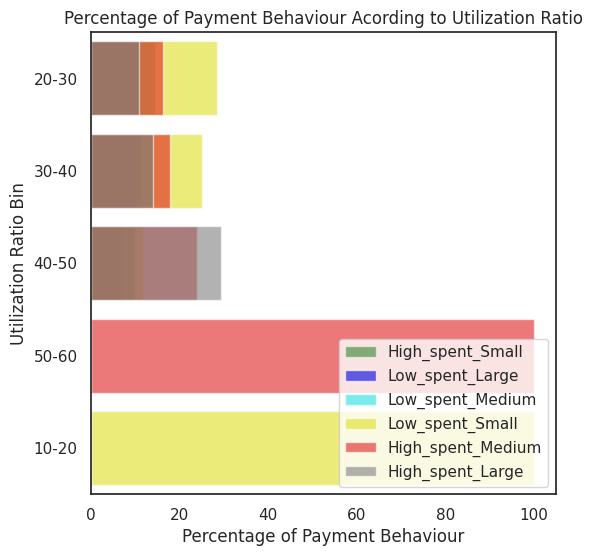

In [36]:
f,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=High_spent_Small,y=u_rat_list,color="green",alpha=0.5,label="High_spent_Small")
sns.barplot(x=Low_spent_Large,y=u_rat_list,color="blue",alpha=0.7,label="Low_spent_Large")
sns.barplot(x=Low_spent_Medium,y=u_rat_list,color="cyan",alpha=0.6,label="Low_spent_Medium")
sns.barplot(x=Low_spent_Small,y=u_rat_list,color="yellow",alpha=0.6,label="Low_spent_Small")
sns.barplot(x=High_spent_Medium,y=u_rat_list,color="red",alpha=0.6,label="High_spent_Medium")
sns.barplot(x=High_spent_Large,y=u_rat_list,color="gray",alpha=0.6,label="High_spent_Large")

ax.legend(loc="lower right",frameon=True)
ax.set(xlabel="Percentage of Payment Behaviour",ylabel="Utilization Ratio Bin",title="Percentage of Payment Behaviour Acording to Utilization Ratio")
plt.show()

Let's fill the empty values in the payment behaviors with the modes in the credit utilization rate and Customer_ID groups.

In [37]:
def custom_mode(x):
    return x.mode().iloc[0] if not x.mode().empty else pd.NA

df2["Payment_Behaviour"].fillna(value=df2.groupby(["Customer_ID", "Utilization_Ratio_Bin"])["Payment_Behaviour"].transform(custom_mode), inplace=True)
df2["Payment_Behaviour"].isnull().sum()

294

In [38]:
df2["Payment_Behaviour"].fillna(value=df2.groupby(["Utilization_Ratio_Bin"])["Payment_Behaviour"].transform(custom_mode), inplace=True)
df2["Payment_Behaviour"].isnull().sum()

0

In [39]:
data_copy["Payment_Behaviour"]=list(df2["Payment_Behaviour"])
data_copy["Payment_Behaviour"].isnull().sum()

0

#### 7) Credit History Age

Let's convert the loan age into months:

In [40]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
      
        return (num1*12)+num2
    else:
        return x

In [41]:
data_copy["Credit_History_Age"]=data_copy["Credit_History_Age"].apply(lambda x: Month_Converter(x)).astype(np.float64)

We will fill in the empty observations in the credit age variable based on the before and after values.

* method='index': This specifies the interpolation method to use to fill in missing values. The "index" method performs a form of linear interpolation using the index values in the data set.
* limit_direction='both': This specifies that interpolation will be applied in both directions (towards the previous and next values). That is, when filling in a missing value, it interpolates by looking at both the previous and next values.

In [42]:
# Group by 'Customer_ID' and perform index interpolation
data_copy['Credit_History_Age'] = data_copy.groupby('Customer_ID')['Credit_History_Age'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

<a id="8"></a>
### Handling Missing Value for Numerical Variables

#### 1) Monthly Inhand Salary

In [43]:
data_copy[data_copy['Name']=='Aaron Maashoh'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Good,809.98,26.822620,265.00000
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,266.00000
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,NaN,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,267.00000
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.00000
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.00000
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821000265,Scientist,19114.12,NaN,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,270.00000
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8.0,11.27,4.0,Good,809.98,22.537593,271.00000
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.27,4.0,Good,809.98,23.933795,271.00002
100000,0x160a,CUS_0xd40,9,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,2022.0,Good,809.98,35.030402,273.00000
100001,0x160b,CUS_0xd40,10,Aaron Maashoh,24,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.0,13.27,4.0,Good,809.98,33.053114,274.00000


In [44]:
data_copy[data_copy['Name']=='Xolai'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
99872,0x25f32,CUS_0x3855,1,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",4,13.0,9.59,74.0,Good,995.47,36.238303,359.0
99873,0x25f33,CUS_0x3855,2,Xolai,3891,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",2,NaN,9.59,1.0,Good,995.47,36.065495,360.0
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,NaN,Good,995.47,32.808662,361.0
99875,0x25f35,CUS_0x3855,4,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,NaN,9.59,5.0,Good,995.47,31.108037,362.0
99876,0x25f36,CUS_0x3855,5,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",1,11.0,9.59,5.0,Good,995.47,42.272114,363.0
99877,0x25f37,CUS_0x3855,6,Xolai,6476,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",3,NaN,9.59,5.0,Good,995.47,38.556181,364.0
99878,0x25f38,CUS_0x3855,7,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,12.0,9.59,5.0,Good,995.47,36.246273,365.0
99879,0x25f39,CUS_0x3855,8,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,39.747228,366.0
149936,0x25f3a,CUS_0x3855,9,Xolai,28,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",3,13.0,16.59,5.0,Good,995.47,22.070372,367.0
149937,0x25f3b,CUS_0x3855,10,Xolai,28,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,37.261217,368.0


In [45]:
data_copy["Monthly_Inhand_Salary"].fillna(value=data_copy.groupby("Customer_ID")["Monthly_Inhand_Salary"].transform(lambda x: x.mode().iloc[0]),inplace=True)
data_copy["Monthly_Inhand_Salary"].isnull().sum()

0

#### 2) Num of Delayed Payment

In [46]:
data_copy[data_copy['Name']=='Aaron Maashoh'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Good,809.98,26.822620,265.00000
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,266.00000
2,0x1604,CUS_0xd40,3,Aaron Maashoh,500,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,267.00000
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,268.00000
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,269.00000
5,0x1607,CUS_0xd40,6,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,270.00000
6,0x1608,CUS_0xd40,7,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8.0,11.27,4.0,Good,809.98,22.537593,271.00000
7,0x1609,CUS_0xd40,8,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.27,4.0,Good,809.98,23.933795,271.00002
100000,0x160a,CUS_0xd40,9,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,2022.0,Good,809.98,35.030402,273.00000
100001,0x160b,CUS_0xd40,10,Aaron Maashoh,24,821000265,Scientist,19114.12,1824.843333,3,...,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.0,13.27,4.0,Good,809.98,33.053114,274.00000


There are values close to each other. Let's fill the empty values in this variable with the interpolate function.

In [47]:
data_copy['Num_of_Delayed_Payment'] = data_copy.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [48]:
data_copy['Num_of_Delayed_Payment'].isnull().sum()

0

#### 3) Changed Credit Limit
​
There are values close to each other. Let's fill the empty values in this variable with the interpolate function.

In [49]:
data_copy['Changed_Credit_Limit'] = data_copy.groupby('Customer_ID')['Changed_Credit_Limit'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)
data_copy['Changed_Credit_Limit'].isnull().sum()

0

#### 4) Num Credit Inquiries

In [50]:
data_copy[data_copy['Name']=='Xolai'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age
99872,0x25f32,CUS_0x3855,1,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",4,13.0,9.59,74.0,Good,995.47,36.238303,359.0
99873,0x25f33,CUS_0x3855,2,Xolai,3891,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",2,12.0,9.59,1.0,Good,995.47,36.065495,360.0
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,NaN,Good,995.47,32.808662,361.0
99875,0x25f35,CUS_0x3855,4,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,31.108037,362.0
99876,0x25f36,CUS_0x3855,5,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",1,11.0,9.59,5.0,Good,995.47,42.272114,363.0
99877,0x25f37,CUS_0x3855,6,Xolai,6476,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.5,9.59,5.0,Good,995.47,38.556181,364.0
99878,0x25f38,CUS_0x3855,7,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,12.0,9.59,5.0,Good,995.47,36.246273,365.0
99879,0x25f39,CUS_0x3855,8,Xolai,27,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,39.747228,366.0
149936,0x25f3a,CUS_0x3855,9,Xolai,28,963557106,Scientist,118677.54,9963.795,4,...,100,"Debt Consolidation Loan, Personal Loan, Credit...",3,13.0,16.59,5.0,Good,995.47,22.070372,367.0
149937,0x25f3b,CUS_0x3855,10,Xolai,28,963557106,Scientist,118677.54,9963.795,4,...,4,"Debt Consolidation Loan, Personal Loan, Credit...",3,11.0,9.59,5.0,Good,995.47,37.261217,368.0


Let's fill the empty values with the interpolate function

In [51]:
data_copy['Num_Credit_Inquiries'] = data_copy.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(
    lambda x: x.interpolate(method='index', limit_direction='both') if x.count() > 1 else x)

In [52]:
data_copy['Num_Credit_Inquiries'].isnull().sum()

0

In [53]:
data_copy['Num_Credit_Inquiries'].describe()

count    150000.000000
mean         28.508741
std         193.880849
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max        2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [54]:
# Filling extremely high values with mod:
customer_ids=data_copy[(data_copy["Num_Credit_Inquiries"]>15)]["Customer_ID"].values

for id_ in customer_ids:
    
    mode_v = data_copy[data_copy["Customer_ID"] == id_]["Num_Credit_Inquiries"].mode()[0]
    
    data_copy.loc[(data_copy["Customer_ID"]==id_) & ((data_copy["Num_Credit_Inquiries"]>15)),["Num_Credit_Inquiries"]]=mode_v

#### 5) Amount invested monthly

In [55]:
data_copy[data_copy['Name']=='Xolai'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Amount_invested_monthly']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Amount_invested_monthly
99872,0x25f32,CUS_0x3855,1,Xolai,27,963557106,Scientist,118677.54,9963.795,NaN
99873,0x25f33,CUS_0x3855,2,Xolai,3891,963557106,Scientist,118677.54,9963.795,641.849589
99874,0x25f34,CUS_0x3855,3,Xolai,27,963557106,Scientist,118677.54,9963.795,NaN
99875,0x25f35,CUS_0x3855,4,Xolai,27,963557106,Scientist,118677.54,9963.795,287.234631
99876,0x25f36,CUS_0x3855,5,Xolai,27,963557106,Scientist,118677.54,9963.795,94.757926
99877,0x25f37,CUS_0x3855,6,Xolai,6476,963557106,Scientist,118677.54,9963.795,231.276530
99878,0x25f38,CUS_0x3855,7,Xolai,27,963557106,Scientist,118677.54,9963.795,198.762526
99879,0x25f39,CUS_0x3855,8,Xolai,27,963557106,Scientist,118677.54,9963.795,NaN
149936,0x25f3a,CUS_0x3855,9,Xolai,28,963557106,Scientist,118677.54,9963.795,798.172006
149937,0x25f3b,CUS_0x3855,10,Xolai,28,963557106,Scientist,118677.54,9963.795,1305.107070


Let's find out from the correlation matrix which variables the amount invested monthly is associated with:

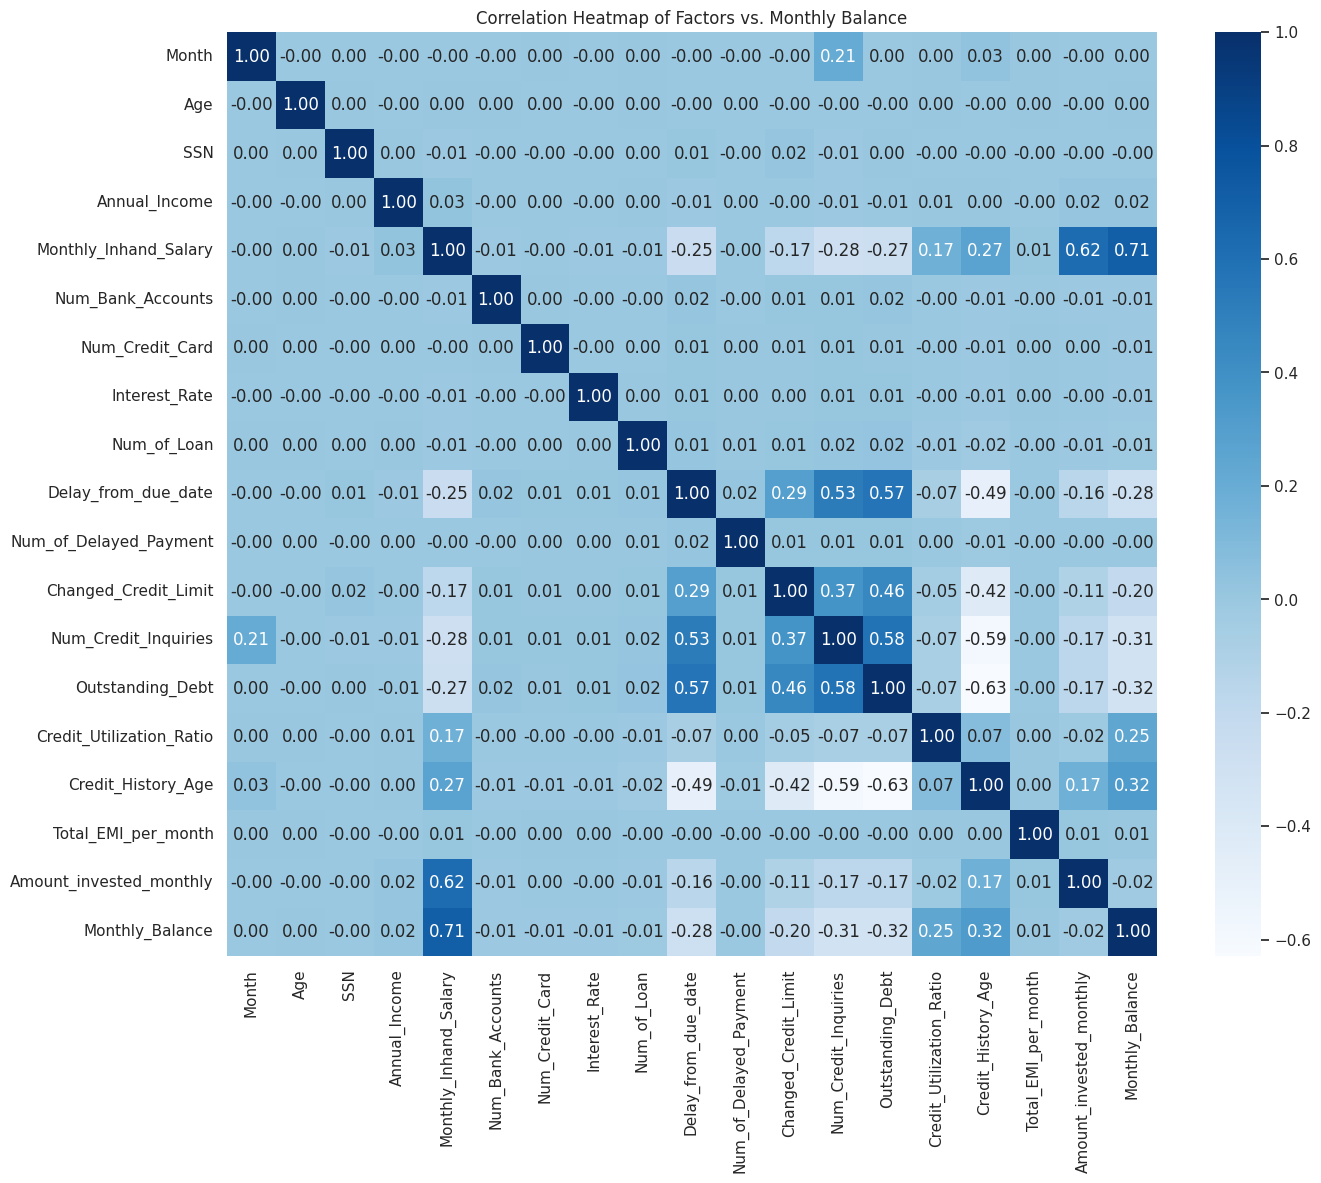

In [56]:
selected_columns=data_copy.select_dtypes(include=["number"])

correlation_matrix=selected_columns.corr()

plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix,annot=True, cmap="Blues",fmt=".2f")
plt.title("Correlation Heatmap of Factors vs. Monthly Balance")
plt.show()

It has a high correlation with monthly salary in hand. We fill it using Monthly Inhand Salary:

In [57]:
data_copy["Amount_invested_monthly"].fillna(value=data_copy.groupby(["Customer_ID", "Monthly_Inhand_Salary"])["Amount_invested_monthly"].transform(custom_mode), inplace=True)
data_copy["Amount_invested_monthly"].isnull().sum()

25

In [58]:
data_copy["Amount_invested_monthly"].fillna(value=data_copy.groupby(["Customer_ID"])["Amount_invested_monthly"].transform(custom_mode), inplace=True)
data_copy["Amount_invested_monthly"].isnull().sum()

0

### 6) Monthly Balance

In [59]:
data_copy[data_copy['Name']=='Greg Roumeliotisw'][['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Amount_invested_monthly','Monthly_Balance']]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Amount_invested_monthly,Monthly_Balance
37368,0xf0f6,CUS_0x670d,1,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,164.244311,301.338697
37369,0xf0f7,CUS_0x670d,2,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,98.306824,357.276184
37370,0xf0f8,CUS_0x670d,3,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,441.268770,64.314239
37371,0xf0f9,CUS_0x670d,4,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,511.113867,NaN
37372,0xf0fa,CUS_0x670d,5,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,551.585097,NaN
37373,0xf0fb,CUS_0x670d,6,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,530.585710,NaN
37374,0xf0fc,CUS_0x670d,7,Greg Roumeliotisw,15,255067657,Lawyer,17334339.00,6097.276667,43.253970,412.329038
37375,0xf0fd,CUS_0x670d,8,Greg Roumeliotisw,15,255067657,Lawyer,72471.32,6097.276667,358.773664,116.809345
38440,0xf73e,CUS_0x5c07,1,Greg Roumeliotisw,31,568808390,Architect,35694.33,2990.527500,46.869072,427.472261
38441,0xf73f,CUS_0x5c07,2,Greg Roumeliotisw,31,568808390,Architect,35694.33,2990.527500,39.100218,389.344759


In [60]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")

data_copy["Monthly_Balance"]=imputer.fit_transform(data_copy[["Monthly_Balance"]])

In [61]:
data_copy.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [62]:
# We filled in the missing values. Now let's separate our data set as training and test data set:
df_train=data_copy[:len_train]
df_test=data_copy[len_train:]

<a id="9"></a>
## Data Preprocessing

In this section, we will perform data preprocessing before training the data in artificial neural networks.

* Generating dummy values to prevent overfitting.
* Selecting a variable
* Normalization and encoding
* Train Test Split

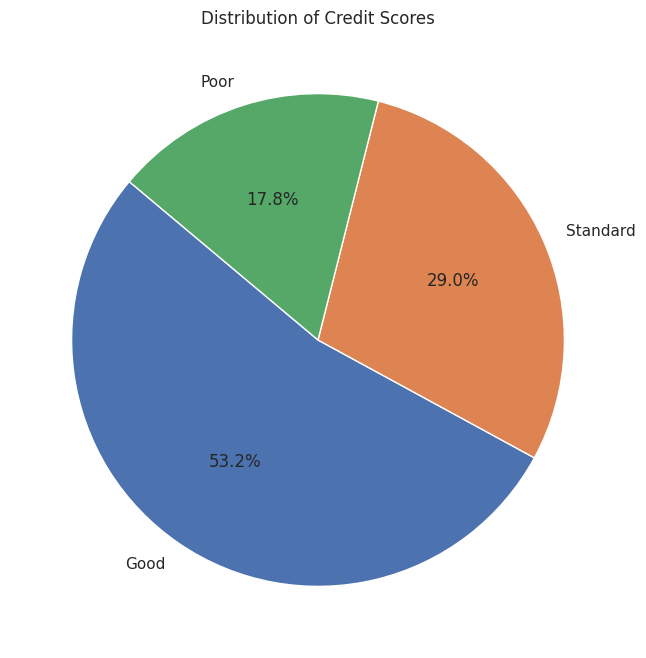

In [63]:
plt.figure(figsize=(8, 8))
plt.pie(df_train['Credit_Score'].value_counts(), labels=df_train['Credit_Score'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Scores')
plt.show()

The dependent variable is not evenly distributed.

In [64]:
df_train.ID = df_train.ID.apply(lambda x: int(x,16)).astype(np.int64)
df_train.Customer_ID = df_train.Customer_ID.apply(lambda x: int(x[4:],16)).astype(np.int64)

df_test.ID = df_test.ID.apply(lambda x: int(x,16)).astype(np.int64)
df_test.Customer_ID = df_test.Customer_ID.apply(lambda x: int(x[4:],16)).astype(np.int64)

df_train.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                           int64
SSN                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [65]:
# Encoding

columns=["Credit_Score"]

for item in columns:
    df_train[item]=LabelEncoder().fit_transform(df_train[item])
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,0
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,0
2,5636,3392,3,Aaron Maashoh,500,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,0
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0


In [66]:
df_train['Credit_Score'].value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

In [67]:
import category_encoders as ce

columns = ['Payment_of_Min_Amount','Payment_Behaviour','Name','Occupation','Credit_Mix']
for item in columns:
    df_train[item] = ce.LeaveOneOutEncoder().fit_transform(df_train[item],df_train['Credit_Score'])
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,0.285714,23,821000265,1.338277,19114.12,1824.843333,3,...,0.863016,809.98,26.822620,265.0,1.099647,49.574949,80.415295,1.351971,312.494089,0
1,5635,3392,2,0.285714,23,821000265,1.338277,19114.12,1824.843333,3,...,0.863016,809.98,31.944960,266.0,1.099647,49.574949,118.280222,1.358135,284.629162,0
2,5636,3392,3,0.285714,500,821000265,1.338277,19114.12,1824.843333,3,...,0.863016,809.98,28.609352,267.0,1.099647,49.574949,81.699521,1.334793,331.209863,0
3,5637,3392,4,0.285714,23,821000265,1.338277,19114.12,1824.843333,3,...,0.863016,809.98,31.377862,268.0,1.099647,49.574949,199.458074,1.387460,223.451310,0
4,5638,3392,5,0.285714,23,821000265,1.338277,19114.12,1824.843333,3,...,0.863016,809.98,24.797347,269.0,1.099647,49.574949,41.420153,1.345276,341.489231,0


In [68]:
df_train.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                        float64
Age                           int64
SSN                           int64
Occupation                  float64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                

In [69]:
df_train.drop("Type_of_Loan",axis=1,inplace=True)
df_test.drop("Type_of_Loan",axis=1,inplace=True)

In [70]:
# Feature Selection With VIF
X=df_train.drop('Credit_Score',axis=1)
y = df_train.Credit_Score

smote = SMOTE() # Synthetic Minority Oversampling TEchnique
X, y = smote.fit_resample(X,y)

In [71]:
## VIF Test

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_data=pd.DataFrame()
vif_data["target"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,target,VIF
0,ID,1.010961
1,Customer_ID,1.000627
2,Month,1.045741
3,Name,1.532235
4,Age,1.000281
5,SSN,3.957254
6,Occupation,0.568141
7,Annual_Income,1.001728
8,Monthly_Inhand_Salary,6.243235
9,Num_Bank_Accounts,1.000640


In [72]:
vif_data[vif_data["VIF"]>5]

,target,VIF
8,Monthly_Inhand_Salary,6.243235


Monthly_Inhand_Salary could be predicted by other independent variables in the dataset.

In [73]:
df_train.drop("Monthly_Inhand_Salary",axis=1,inplace=True)

X=df_train.drop('Credit_Score',axis=1)
y = df_train.Credit_Score

smote = SMOTE() # Synthetic Minority Oversampling TEchnique
X, y = smote.fit_resample(X,y)

In [74]:
# Standardization:
sc=StandardScaler()
X=sc.fit_transform(X)

In [75]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

y=to_categorical(y, num_classes=3) # format [0,0,1]

In [76]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=42)

In [77]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

<a id="10"></a>
## Model Building

In [78]:
!pip install scikeras

  Obtaining dependency information for scikeras from https://files.pythonhosted.org/packages/5d/fa/9c1967952e7889d698f10ba8b6af79dfaa2e05178d97a79fbd9d1b44e589/scikeras-0.12.0-py3-none-any.whl.metadata


In [79]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop, Adam
from keras.regularizers import L2

In [80]:
model=Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

es=EarlyStopping(monitor="val_accuracy",patience=20,mode="max",verbose=1)

hist=model.fit(X_train,
               y_train,
               epochs=500,
               batch_size=512,
               validation_data=(X_val,y_val),
               verbose=0,callbacks=[es])

Epoch 235: early stopping


In [81]:
history_dict=hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

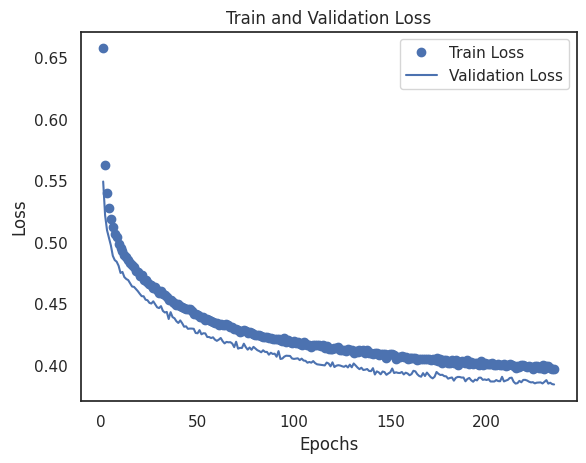

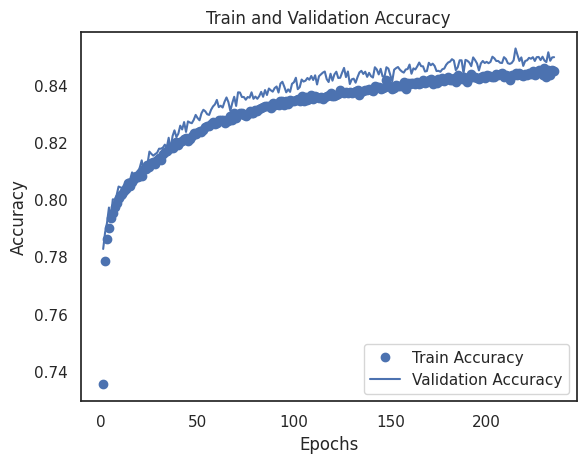

In [82]:
# model evulate:
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values, "bo", label="Train Loss")
plt.plot(epochs,val_loss_values, "b", label="Validation Loss")
plt.title("Train and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure()

acc=history_dict["accuracy"]
val_acc=history_dict["val_accuracy"]

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,acc, "bo", label="Train Accuracy")
plt.plot(epochs,val_acc, "b", label="Validation Accuracy")
plt.title("Train and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [83]:
results=model.evaluate(X_test, y_test)
results

998/998 [==============================] - 1s 1ms/step - loss: 0.3782 - accuracy: 0.8549


[0.3781604766845703, 0.8549443483352661]

399/399 [==============================] - 1s 1ms/step


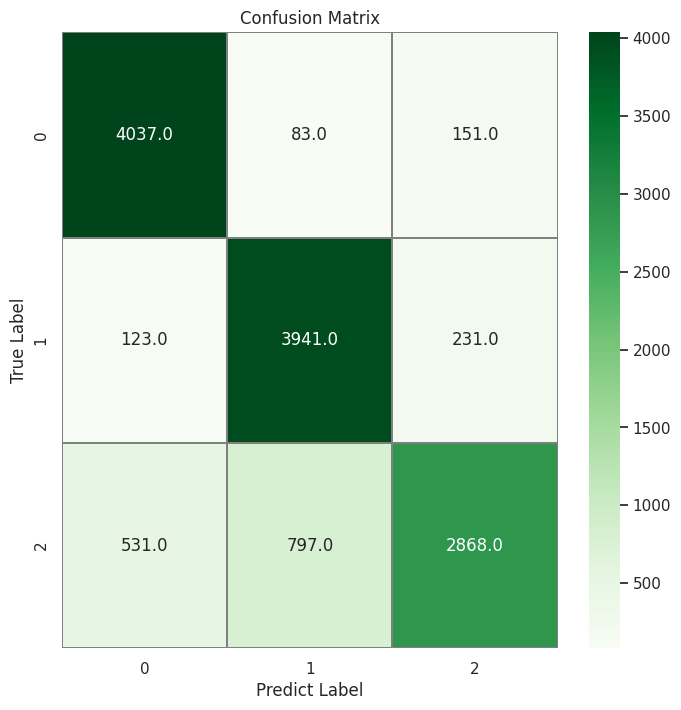

In [84]:
# confusion matrix
# Predict the values from validation dataset
Y_pred=model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred, axis=1)
# Convert validation observation to one hot vectors
Y_true=np.argmax(y_val, axis=1)
# Compute the confusion matrix
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
# plot confusion matrix
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

998/998 [==============================] - 1s 1ms/step


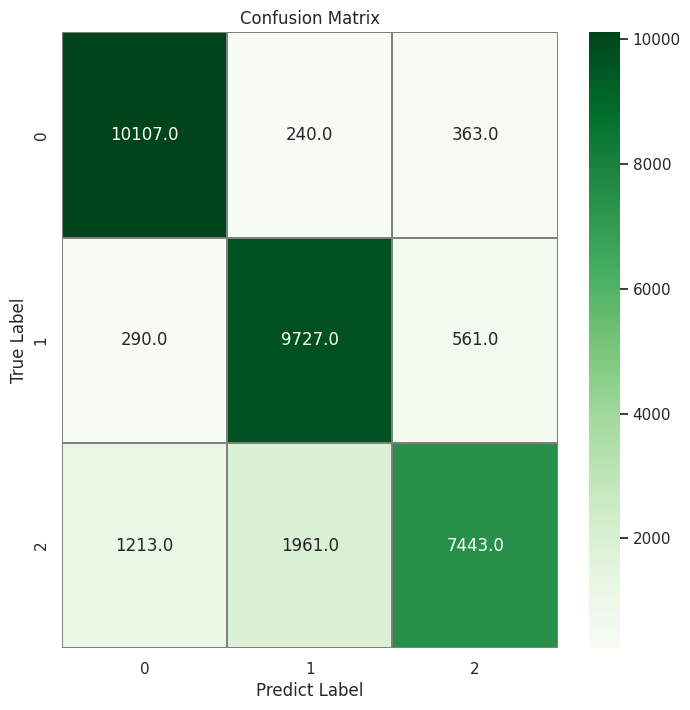

In [85]:
# For TEST
# confusion matrix
# Predict the values from validation dataset
Y_pred=model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred, axis=1)
# Convert validation observation to one hot vectors
Y_true=np.argmax(y_test, axis=1)
# Compute the confusion matrix
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
# plot confusion matrix
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [86]:
#def create_model(optimizer="rmsprop", init="glorot_uniform"):
    #model=Sequential()
    #model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer=init, activation="relu"))
    #model.add(Dropout(0.2))
    #model.add(Dense(128, kernel_initializer=init, activation="relu"))
    #model.add(Dropout(0.2))
    #model.add(Dense(64, kernel_initializer=init, activation="relu"))
    #model.add(Dropout(0.2))
    #model.add(Dense(3, kernel_initializer=init, activation="softmax"))
    #model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #return model

#seed = 7
#np.random.seed(seed)

# create model
#model = KerasClassifier(model=create_model, verbose=0)

# grid search epochs, batch size and optimizer
#optimizers = ['rmsprop', 'adam']
#init = ['glorot_uniform', 'normal', 'uniform']
#epochs = [50, 100, 150]
#batches = [32, 64, 125]
#param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, model__init=init)
#grid = GridSearchCV(estimator=model, param_grid=param_grid)
#grid_result = grid.fit(X_train, y_train)

# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']

#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

In [87]:
df_train.describe


<bound method NDFrame.describe of            ID  Customer_ID  Month      Name  Age        SSN  Occupation  \
0        5634         3392      1  0.285714   23  821000265    1.338277   
1        5635         3392      2  0.285714   23  821000265    1.338277   
2        5636         3392      3  0.285714  500  821000265    1.338277   
3        5637         3392      4  0.285714   23  821000265    1.338277   
4        5638         3392      5  0.285714   23  821000265    1.338277   
...       ...          ...    ...       ...  ...        ...         ...   
99995  155625        37932      4  1.285714   25   78735990    1.371661   
99996  155626        37932      5  1.285714   25   78735990    1.371661   
99997  155627        37932      6  1.285714   25   78735990    1.371661   
99998  155628        37932      7  1.142857   25   78735990    1.371513   
99999  155629        37932      8  1.285714   25   78735990    1.371661   

       Annual_Income  Num_Bank_Accounts  Num_Credit_Card  ...  Cr

In [88]:
import tensorflow as tf
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers

In [89]:
X_train

array([[-0.87918412, -0.50644646, -0.62972637, ..., -0.78773993,
        -0.8129261 , -0.45197177],
       [ 0.4533129 ,  1.30419769, -1.09783516, ..., -0.46332833,
        -0.43093468,  0.29125983],
       [ 0.90511402,  1.70186747, -1.09783516, ..., -0.48849763,
         1.53754675, -0.4225831 ],
       ...,
       [ 1.49205083,  0.18091793,  0.30649121, ..., -0.43675763,
         0.22237105, -1.3654467 ],
       [ 1.1164336 ,  0.80961088,  0.30649121, ..., -0.89000507,
        -1.31599711, -0.51290508],
       [-0.24069064, -1.58169031, -0.62972637, ..., -0.70019931,
         1.53430854, -0.15344186]])

In [90]:
# XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Get predictions from XGBoost model
xgb_predictions = xgb_model.predict(X_test)

# Bidirectional Transformer model with global average pooling
def transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.GlobalAveragePooling1D()(x)  # Global Average Pooling
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Using sigmoid activation for binary classification
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Define input shape
input_shape = (X_train.shape[1],)  # Number of input features

# Instantiate the Transformer model
transformer_model = transformer_model(input_shape)

# Compile the Transformer model
transformer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Transformer model
transformer_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate the Transformer model
transformer_predictions = transformer_model.predict(X_test)
transformer_predictions = tf.round(transformer_predictions)

# Combine predictions
combined_predictions = (xgb_predictions + transformer_predictions.numpy().flatten()) // 2
combined_accuracy = accuracy_score(y_test, combined_predictions)

print("Combined Model Accuracy:", combined_accuracy)

ValueError: Input 0 of layer "global_average_pooling1d" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 128)